EiGroup Technical Task - Section 1 {-}
===
**Author: Abbas Aliyev**

# Introduction {-}
In this section I am going to analyze the Yelp reviews dataset. This represents reviews of different businesses on the Yelp website. Each row is one review with such information as reviewer, reviewed business, its type(Hotel, Restaurant, etc.), date of the review, location of the review, review text, and review rating. I am going to perform simple analysis of this dataset, focusing on 8 questions outlined in the task. Each question will be its own section in this notebook.

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
from tqdm.notebook import tqdm

In [2]:
DATA = Path('data')
section1 = DATA / 'Section 1 data.csv'

In [3]:
df = pd.read_csv(section1)

df.head()

,Review_Date,Review_Text,User_ID,Business_ID,Business_Name,Business_Category,City,State,Latitude,Longitude,Avg_Business_Star_Rating
0,2014-07-16,okay...so so,6VxJJX7h36bMCCFt7URg6w,9QqLqYIwV-n1BJPjnaYv8A,Beef 'O' Brady's,Bars,Chandler,AZ,33.303847,-111.946838,3.5
1,2014-07-16,Some people complain about the prices but Subw...,viGPiPuMZnV4PR_aiA3-qw,pNQwnY_q4okdlnPiR-3RBA,Empire Bagels,Food,Las Vegas,NV,36.077299,-115.297979,3.5
2,2014-07-16,"Had red curry chicken, the chicken itself was ...",rwehMCinfBjhZ0IbR1zFBw,shCdCHRbnY5FTMJbWl-myQ,Thai Spices,Thai,Mesa,AZ,33.412708,-111.875803,4.0
3,2014-07-16,"Alright, I gave the restaurant manager ample t...",VWqt5IH8fm-k9M0CKFkJzg,HpaYCM_NCauI72LLXxC6SA,Yonaka Modern Japanese,Tapas/Small Plates,Las Vegas,NV,36.114935,-115.209737,4.5
4,2014-07-16,Blehhhh :/ this place shouldn't even be in bus...,Y6-0ToMhjBsm8iYEaT2meg,FC4q3hJyF8oo984xoo3RMg,808 Sushi,Sushi Bars,Las Vegas,NV,36.052181,-115.279227,3.5


Very insignificant amount of missing data, I am going to ignore it.

In [4]:
# check for NaN values
df.isna().sum()

Review_Date                   0
Review_Text                   1
User_ID                       0
Business_ID                   0
Business_Name                 0
Business_Category           284
City                          0
State                         0
Latitude                      0
Longitude                     0
Avg_Business_Star_Rating      0
dtype: int64

## How many unique restaurants could be found in this data set? (Hint: Use the [Business_ID] column for this evaluation.)

In [6]:
# first look at unique business categories
"Restaurants" in df['Business_Category'].unique()

True

In [7]:
# first get number of restaurant reviews, using Business_Category
restaurants = df[df['Business_Category'] == 'Restaurants']

print(f"Number of restaurant reviews: {len(restaurants)}")
print(f"Number of unique restaurants: {restaurants['Business_ID'].nunique()}")

Number of restaurant reviews: 6513
Number of unique restaurants: 594


## Which restaurant received the highest number of reviews? What about percentage-wise?

In [63]:
# Get review count per restaurant
restaurant_review_counts = restaurants.groupby(['Business_ID', 'Business_Name'])['Review_Text'].count().reset_index()
restaurant_review_counts = restaurant_review_counts.rename(columns={'Review_Text': 'Review_Count'})

# Calculate percentage of total reviews for each restaurant
total_reviews = len(restaurants)
restaurant_review_counts['Review_Percentage'] = (restaurant_review_counts['Review_Count'] / total_reviews * 100).round(2)

restaurant_review_counts.head()

,Business_ID,Business_Name,Review_Count,Review_Percentage
0,-2n-OHbbwIv3SY8RP9bgTQ,Maggiano's Little Italy,126,1.93
1,-5xC7s9Ujg5F-3xFXtM_kg,Benvenuto's Italian Grill,2,0.03
2,-6n29ZcBHteJ9eEexoRQ7g,Sassi,22,0.34
3,-DRpMxRhHEKf5awoVpROkQ,Toby Carvery,1,0.02
4,-PcyNcCHU8ZWwf6_PwDbUQ,Enoteca San Marco,50,0.77


In [10]:
# Sort by review count in descending order and get the top restaurant
top_restaurant = restaurant_review_counts.sort_values('Review_Count', ascending=False).head(1)

print("Restaurant with highest number of reviews:")
print(f"Restaurant Name: {top_restaurant['Business_Name'].values[0]}")
print(f"Number of Reviews: {top_restaurant['Review_Count'].values[0]}")
print(f"Percentage of Total Reviews: {top_restaurant['Review_Percentage'].values[0]}%")

Restaurant with highest number of reviews:
Restaurant Name: LAVO Italian Restaurant & Lounge
Number of Reviews: 201
Percentage of Total Reviews: 3.09%


In [11]:
# Bonus! Display top 5 restaurants by review count for context
print("Top 5 restaurants by review count:")
restaurant_review_counts.sort_values('Review_Count', ascending=False).head()

Top 5 restaurants by review count:


,Business_ID,Business_Name,Review_Count,Review_Percentage
49,5GKbGn9-fAgQ0njSh3OJ8A,LAVO Italian Restaurant & Lounge,201,3.09
441,iXA8Y2bzvZo8MjALfZxrIg,Margaritaville,137,2.10
75,8Pzdk19tA2bKlKDSgwWqoQ,Scarpetta,134,2.06
0,-2n-OHbbwIv3SY8RP9bgTQ,Maggiano's Little Italy,126,1.93
515,rNahhyqDlouyDMHh57p3ug,B&B Ristorante,110,1.69


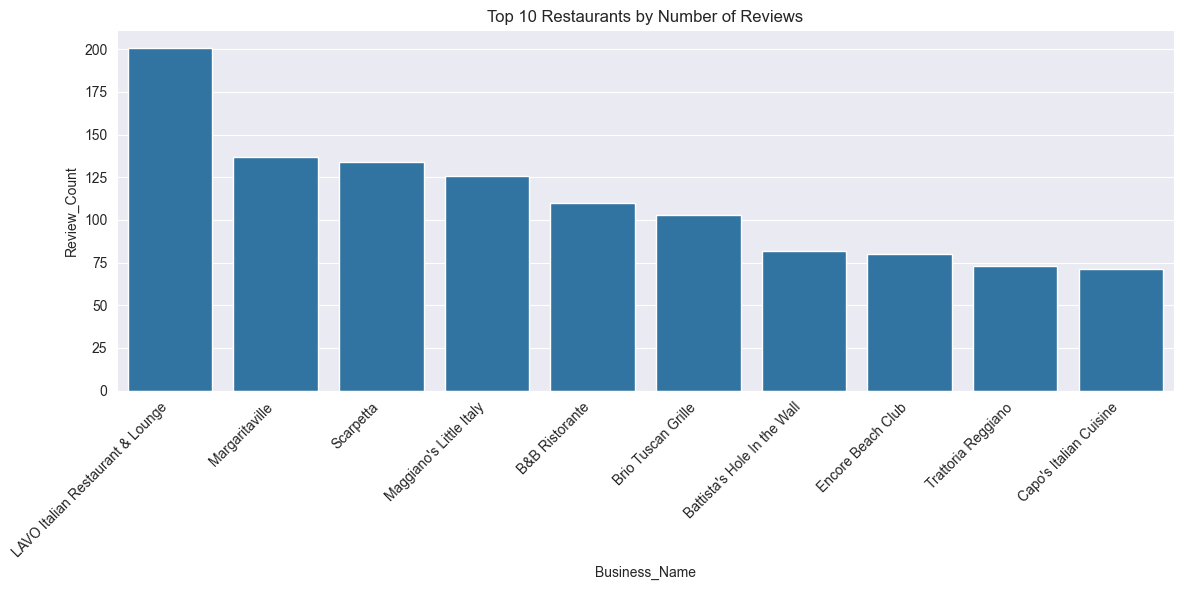

In [12]:
# Create bar plot of top 10 restaurants
plt.figure(figsize=(12, 6))
top_10_restaurants = restaurant_review_counts.nlargest(10, 'Review_Count')
sns.barplot(data=top_10_restaurants, x='Business_Name', y='Review_Count')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Restaurants by Number of Reviews')
plt.tight_layout()
plt.show()

## Which cities have got at least one 5-star review in Nevada (NV) state?

In [13]:
# Filter for Nevada businesses with 5-star reviews
nevada_five_stars = df[
    (df['State'] == 'NV') &
    (df['Avg_Business_Star_Rating'] == 5)
    ]

# Get unique cities with 5-star reviews
nevada_cities_five_stars = nevada_five_stars['City'].unique()

# Print the results
print("\nCities in Nevada with at least one 5-star review (all business types):")
for city in sorted(nevada_cities_five_stars):
    print(f"- {city}")


Cities in Nevada with at least one 5-star review (all business types):
- Boulder City
- Henderson
- Las Vegas
- Nellis


In [14]:
# Bonus! Show count of 5-star reviews per city
city_five_star_counts = nevada_five_stars.groupby('City').size().sort_values(ascending=False)
print("\nNumber of 5-star reviews per city in Nevada:")
print(city_five_star_counts)


Number of 5-star reviews per city in Nevada:
City
Las Vegas       2694
Henderson        382
Boulder City      21
Nellis             4
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_29672\1448034582.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


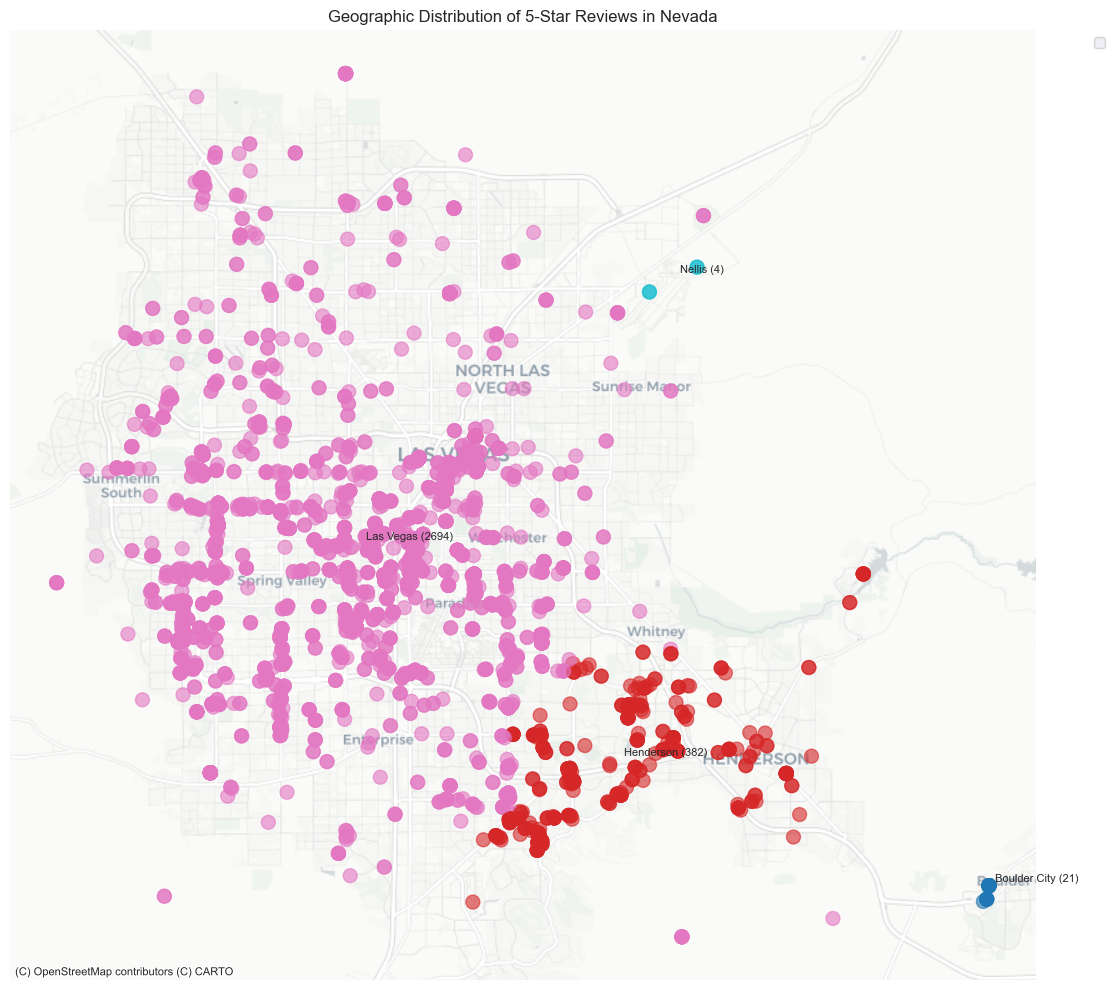

In [15]:
# Bonus! Plot scatter of the reviews on the map of Nevada

import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point

# Convert the data to GeoDataFrame
geometry = [Point(xy) for xy in zip(nevada_five_stars['Longitude'], nevada_five_stars['Latitude'])]
gdf = gpd.GeoDataFrame(nevada_five_stars, geometry=geometry, crs='EPSG:4326')

# Convert to Web Mercator projection for contextily
gdf = gdf.to_crs(epsg=3857)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the points
gdf.plot(ax=ax,
         column='City',  # Color by city
         categorical=True,  # Treat city as categorical variable
         alpha=0.6,
         markersize=100,
         legend=True)

# Add city labels with counts
for city, group in gdf.groupby('City'):
    # Calculate mean position for label
    mean_x = group.geometry.x.mean()
    mean_y = group.geometry.y.mean()
    count = len(group)
    ax.annotate(f"{city} ({count})",
                xy=(mean_x, mean_y),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=8)

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Customize the plot
plt.title('Geographic Distribution of 5-Star Reviews in Nevada')
plt.axis('off')  # Turn off axis as they're no longer longitude/latitude

# Adjust legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

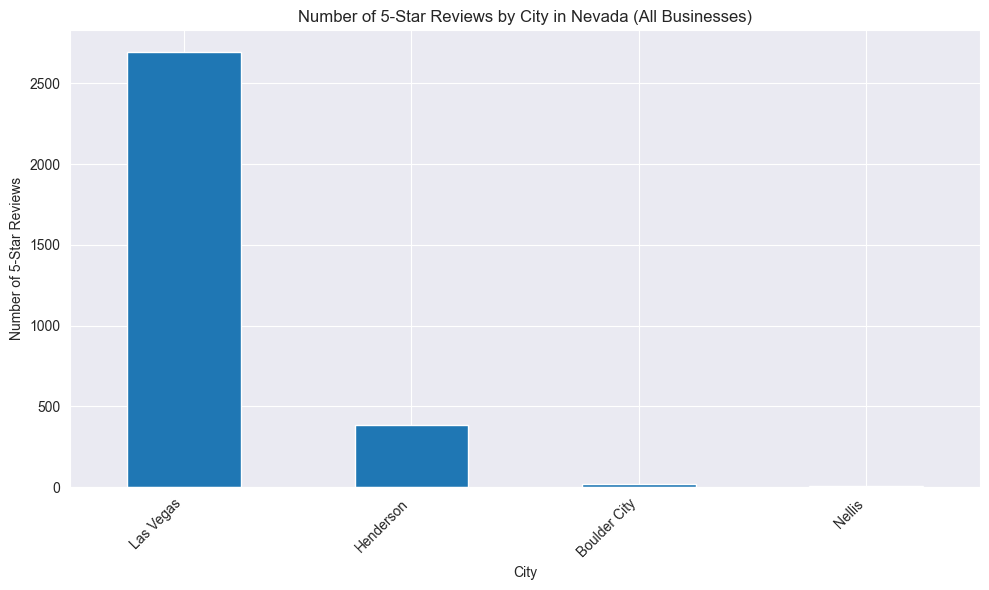

In [16]:
# Visualize the distribution
plt.figure(figsize=(10, 6))
city_five_star_counts.plot(kind='bar')
plt.title('Number of 5-Star Reviews by City in Nevada (All Businesses)')
plt.xlabel('City')
plt.ylabel('Number of 5-Star Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Which city has the highest number of reviews in the Business Category of “Hotels & Travel”? What about percentage-wise?

In [64]:
# Filter for Hotels & Travel category
hotels_travel = df[df['Business_Category'] == 'Hotels & Travel']

# Get review count per city
city_review_counts = hotels_travel.groupby('City')['Review_Text'].count().reset_index()
city_review_counts = city_review_counts.rename(columns={'Review_Text': 'Review_Count'})

# Calculate percentage of total reviews for each city
total_reviews = len(hotels_travel)
city_review_counts['Review_Percentage'] = (city_review_counts['Review_Count'] / total_reviews * 100).round(2)

# Sort by review count in descending order and get the top city
top_city = city_review_counts.sort_values('Review_Count', ascending=False).head(1)

print("City with highest number of Hotels & Travel reviews:")
print(f"City: {top_city['City'].values[0]}")
print(f"Number of Reviews: {top_city['Review_Count'].values[0]}")
print(f"Percentage of Total Reviews: {top_city['Review_Percentage'].values[0]}%")


Top 5 cities by Hotels & Travel review count:
          City  Review_Count  Review_Percentage
23   Las Vegas         10245              77.64
32     Phoenix          1188               9.00
33  Scottsdale           633               4.80
20   Henderson           202               1.53
36       Tempe           177               1.34


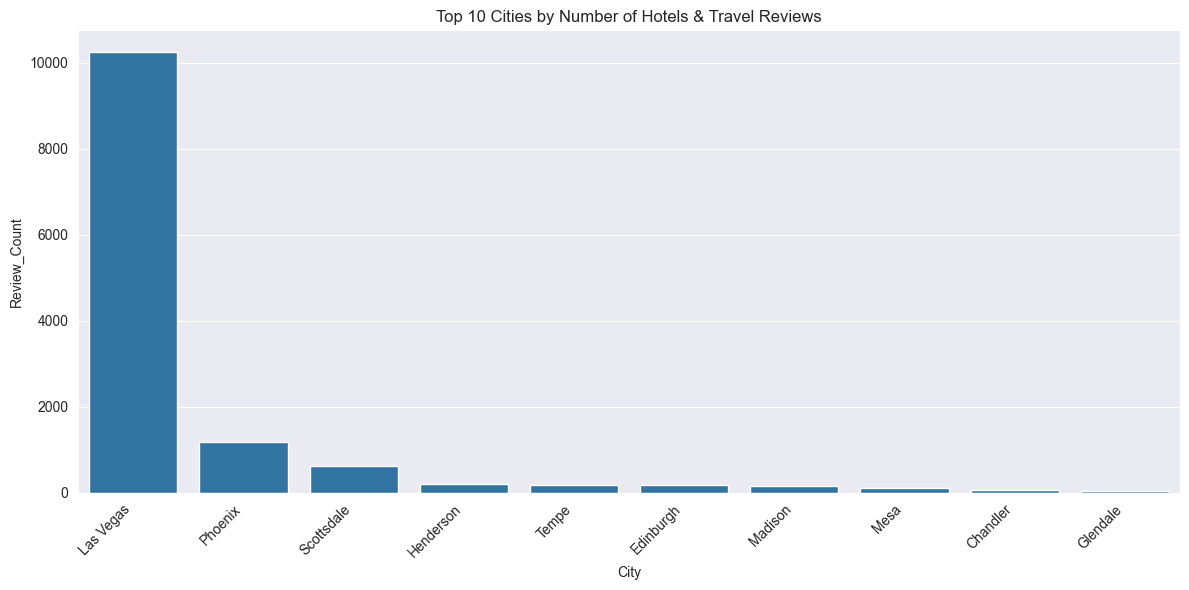

In [20]:
# Bonus! Display top 5 cities by review count for context
print("\nTop 5 cities by Hotels & Travel review count:")
print(city_review_counts.sort_values('Review_Count', ascending=False).head())

# Create visualization
plt.figure(figsize=(12, 6))
top_10_cities = city_review_counts.nlargest(10, 'Review_Count')
sns.barplot(data=top_10_cities, x='City', y='Review_Count')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cities by Number of Hotels & Travel Reviews')
plt.tight_layout()
plt.show()

## At what day of the week people are more likely to post their reviews?

In [21]:
# Convert Review_Date to datetime if it's not already
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

# Extract day of week (0 = Monday, 6 = Sunday)
df['Day_of_Week'] = df['Review_Date'].dt.dayofweek
df['Day_Name'] = df['Review_Date'].dt.day_name()

# Count reviews by day of week
day_counts = df['Day_of_Week'].value_counts().sort_index()
day_names = df['Day_Name'].value_counts()
day_names

Day_Name
Monday       36446
Tuesday      34262
Wednesday    34170
Sunday       32889
Thursday     30669
Friday       29574
Saturday     29571
Name: count, dtype: int64

In [22]:
# Calculate percentages
total_reviews = len(df)
day_percentages = (day_counts / total_reviews * 100).round(2)

# Create a DataFrame with both counts and percentages
day_analysis = pd.DataFrame({
    'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'Count': day_counts.values,
    'Percentage': day_percentages.values
})
day_analysis

,Day,Count,Percentage
0,Monday,36446,16.01
1,Tuesday,34262,15.05
2,Wednesday,34170,15.01
3,Thursday,30669,13.48
4,Friday,29574,12.99
5,Saturday,29571,12.99
6,Sunday,32889,14.45


In [23]:
most_popular_day = day_analysis.loc[day_analysis['Count'].idxmax()]
print(f"Most popular day for posting reviews:")
print(f"Day: {most_popular_day['Day']}")
print(f"Number of reviews: {most_popular_day['Count']}")
print(f"Percentage of total: {most_popular_day['Percentage']}%")

Most popular day for posting reviews:
Day: Monday
Number of reviews: 36446
Percentage of total: 16.01%


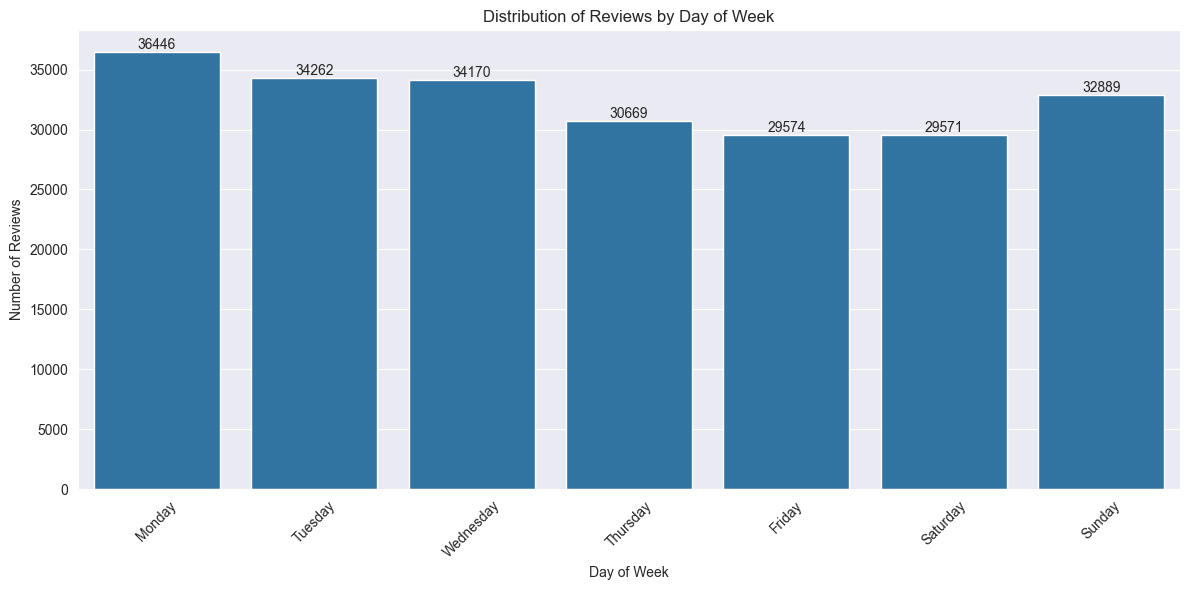

In [24]:
# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=day_analysis, x='Day', y='Count')
plt.title('Distribution of Reviews by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(day_analysis['Count']):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

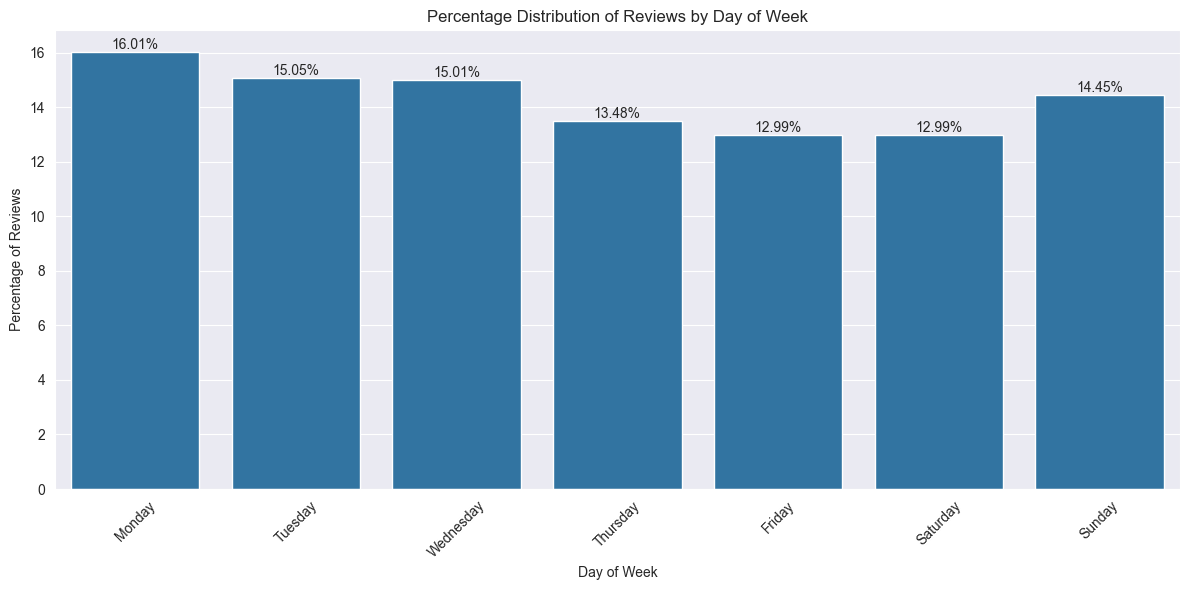

In [24]:
# Percentage distribution plot
plt.figure(figsize=(12, 6))
sns.barplot(data=day_analysis, x='Day', y='Percentage')
plt.title('Percentage Distribution of Reviews by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Percentage of Reviews')
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for i, v in enumerate(day_analysis['Percentage']):
    plt.text(i, v, f'{v}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Showcase if there are any trends regarding restaurant performance as time goes by.

## Analyze number of reviews per week
Nothing meaningful here, number of reviews grows as more and more people use Yelp.

C:\Users\User\AppData\Local\Temp\ipykernel_29672\1139463922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants['Review_Date'] = pd.to_datetime(restaurants['Review_Date'])


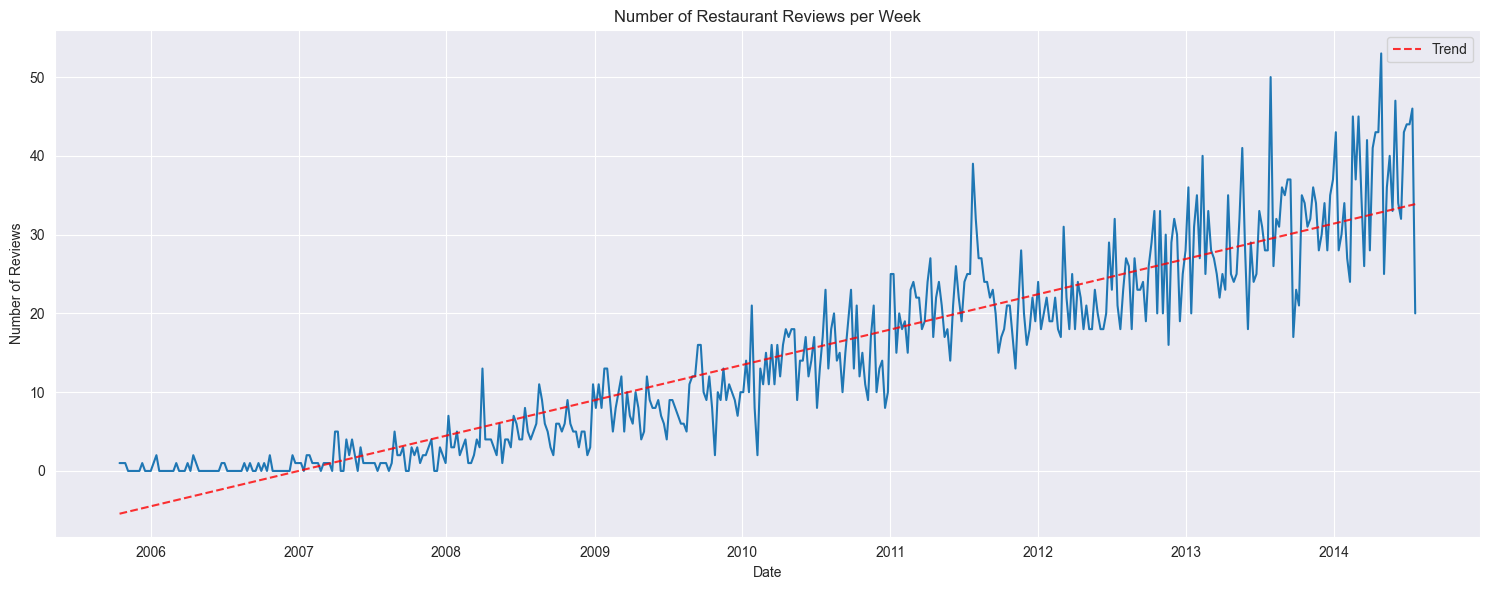

In [25]:
# Filter for restaurants and convert date
restaurants['Review_Date'] = pd.to_datetime(restaurants['Review_Date'])

# Group by week and count reviews
weekly_reviews = restaurants.groupby(pd.Grouper(key='Review_Date', freq='W'))['Review_Text'].count().reset_index()

# Plot weekly trend
plt.figure(figsize=(15, 6))
plt.plot(weekly_reviews['Review_Date'], weekly_reviews['Review_Text'])
plt.title('Number of Restaurant Reviews per Week')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)

# Add trend line
z = np.polyfit(range(len(weekly_reviews)), weekly_reviews['Review_Text'], 1)
p = np.poly1d(z)
plt.plot(weekly_reviews['Review_Date'], p(range(len(weekly_reviews))), "r--", alpha=0.8, label='Trend')
plt.legend()
plt.tight_layout()
plt.show()

## Animated top 10 restaurants over time
I always loved watching such animations of popularity over time. And here is one for you.

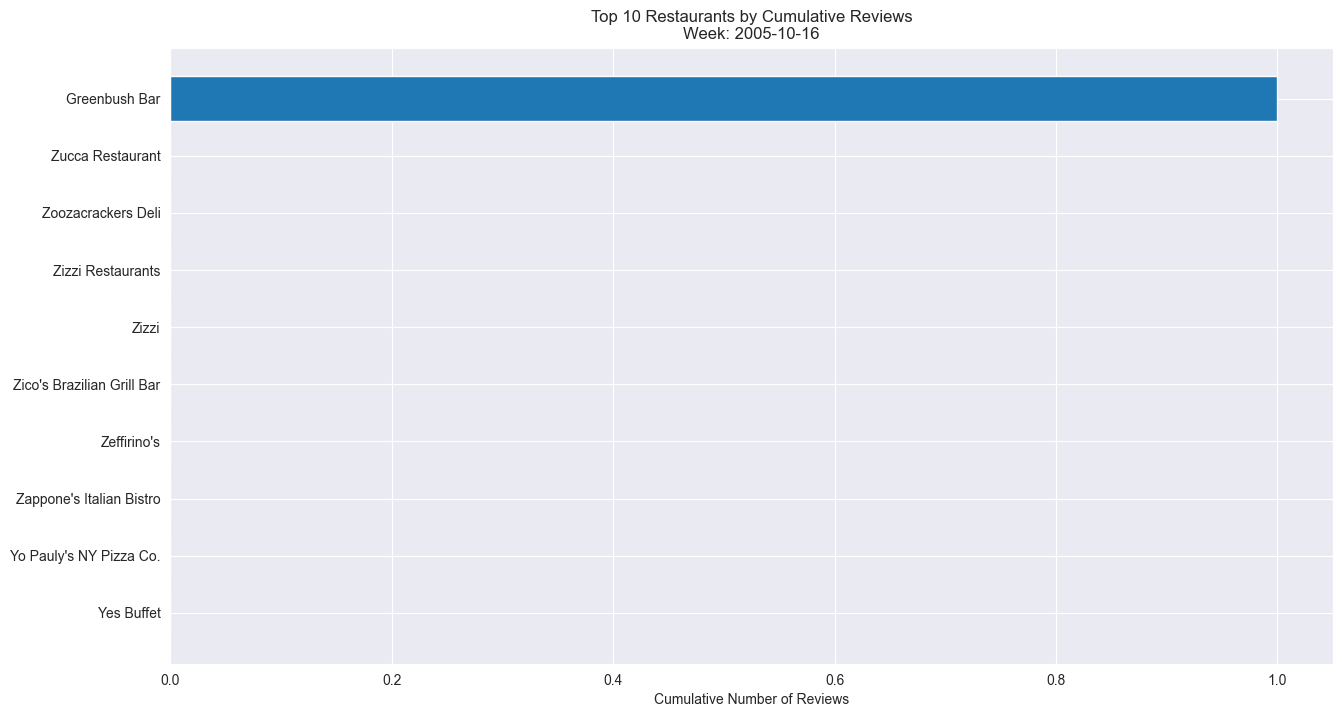

In [26]:
from matplotlib.animation import FuncAnimation

# Group by week and restaurant
weekly_restaurant_reviews = restaurants.groupby([
    pd.Grouper(key='Review_Date', freq='W'),
    'Business_Name'
])['Review_Text'].count().reset_index()

# Create pivot table for easier manipulation
pivot_reviews = weekly_restaurant_reviews.pivot(
    index='Review_Date',
    columns='Business_Name',
    values='Review_Text'
).fillna(0)

# Calculate cumulative sums
cumulative_reviews = pivot_reviews.cumsum()

# Function to create bar chart for each frame
def animate(frame):
    plt.clf()
    data = cumulative_reviews.iloc[frame].sort_values(ascending=True)[-10:]  # Top 10
    plt.barh(range(len(data)), data.values)
    plt.yticks(range(len(data)), data.index)
    plt.title(f'Top 10 Restaurants by Cumulative Reviews\nWeek: {cumulative_reviews.index[frame].strftime("%Y-%m-%d")}')
    plt.xlabel('Cumulative Number of Reviews')

# Create animation
fig = plt.figure(figsize=(15, 8))
anim = FuncAnimation(fig, animate, frames=len(cumulative_reviews), interval=200)
plt.tight_layout()
anim.save('restaurant_reviews.gif')

## Plot number of different review ratings over time
We can see here that people rarely rate restaurants above 4 and most ratings are 3.5 and 4. I will try to check is there is any seasonality pattern and what makes people leave good reviews

C:\Users\User\AppData\Local\Temp\ipykernel_29672\3545561876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants['Month'] = restaurants['Review_Date'].dt.to_period('M').astype(str)


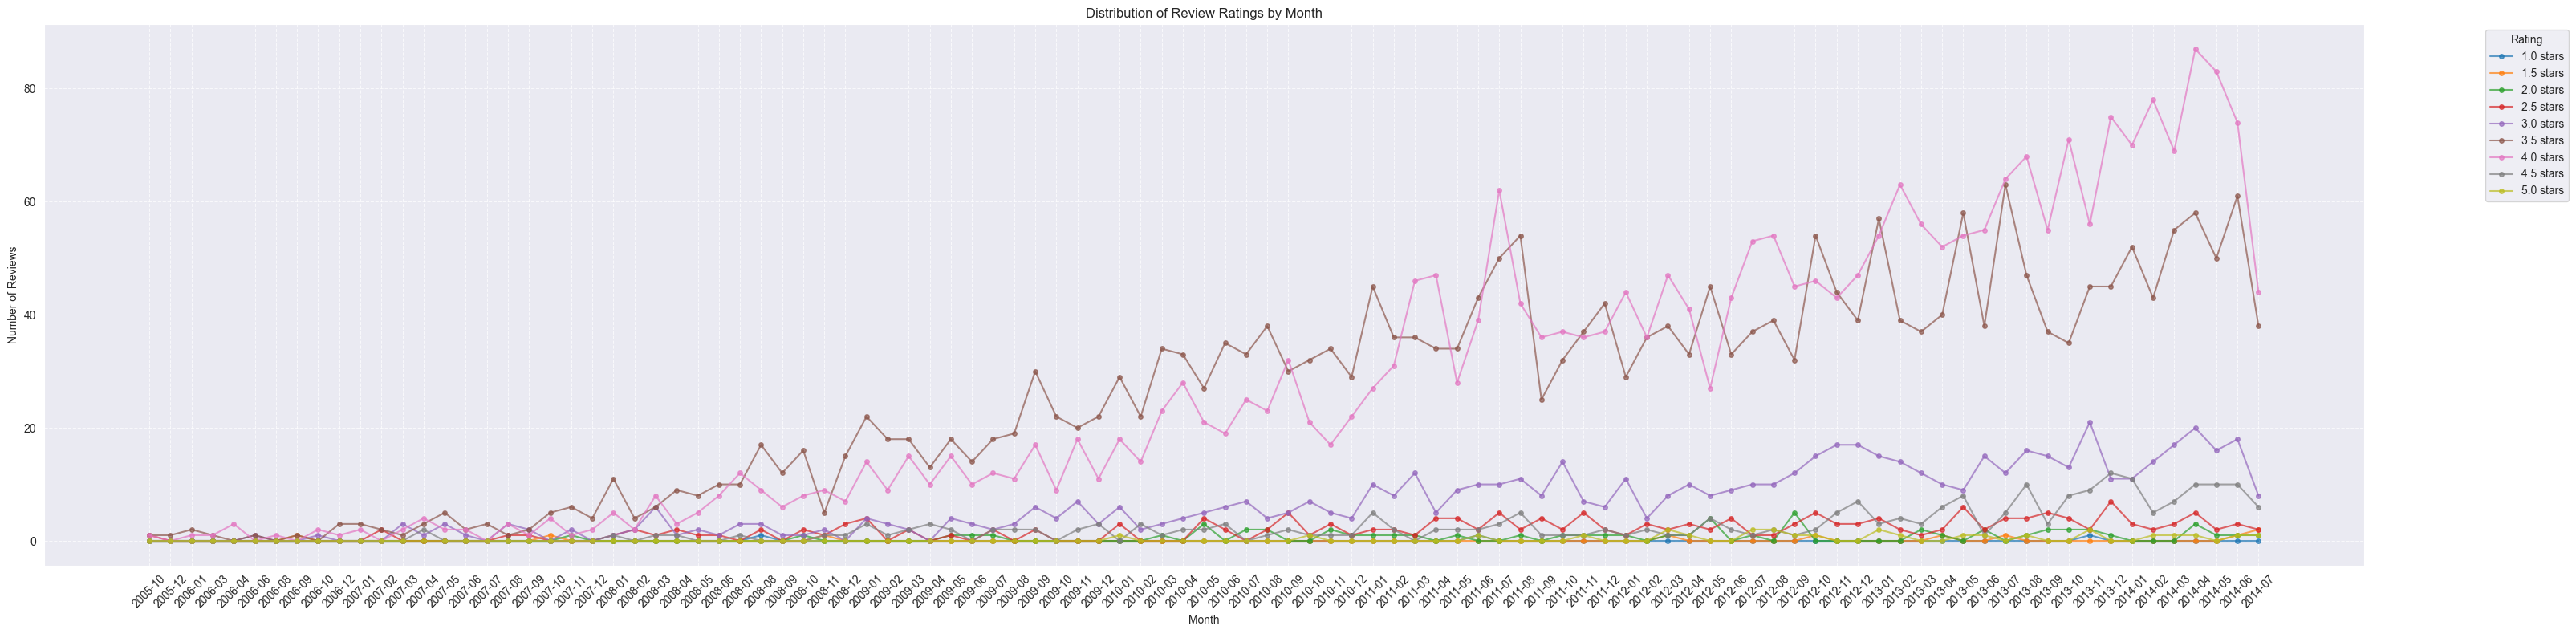

In [51]:
# Convert dates to month start for grouping
restaurants['Month'] = restaurants['Review_Date'].dt.to_period('M').astype(str)

# Group the data by month and rating, count reviews
rating_by_month = restaurants.groupby(['Month', 'Avg_Business_Star_Rating']).size().unstack(fill_value=0)

# Create the plot
plt.figure(figsize=(32, 8))

# Plot each rating as a separate line
for rating in sorted(df['Avg_Business_Star_Rating'].unique()):
    plt.plot(range(len(rating_by_month)),
             rating_by_month[rating],
             label=f'{rating} stars',
             marker='o',  # add markers for data points
             markersize=4,
             alpha=0.7)  # slight transparency for better visibility

plt.title('Distribution of Review Ratings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis ticks to show months
plt.xticks(range(len(rating_by_month)),
           rating_by_month.index,
           rotation=45)

plt.tight_layout()
plt.show()

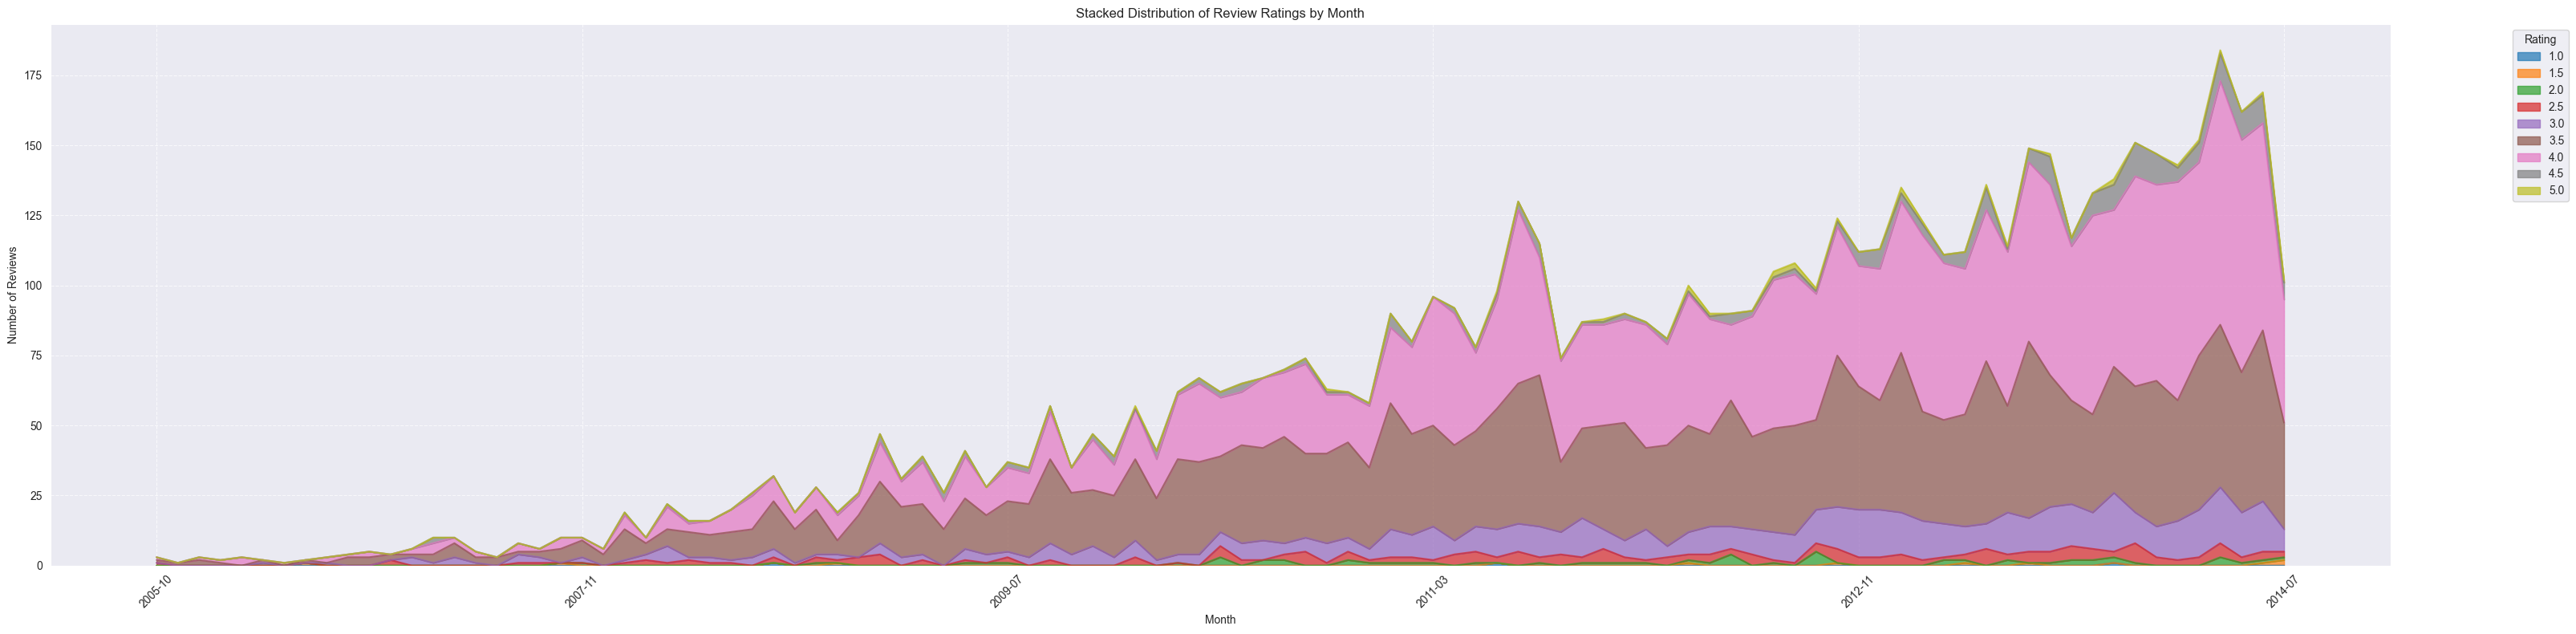


Monthly average number of reviews by rating:
Avg_Business_Star_Rating
1.0     0.03
1.5     0.10
2.0     0.55
2.5     1.80
3.0     6.41
3.5    25.79
4.0    27.24
4.5     2.31
5.0     0.26
dtype: float64

Total number of reviews by rating:
Avg_Business_Star_Rating
1.0       3
1.5      10
2.0      56
2.5     182
3.0     647
3.5    2605
4.0    2751
4.5     233
5.0      26
dtype: int64


In [52]:
# Bonus: Stacked area plot
rating_by_month.plot(kind='area', stacked=True, alpha=0.7, figsize=(32, 8))
plt.title('Stacked Distribution of Review Ratings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nMonthly average number of reviews by rating:")
print(rating_by_month.mean().round(2))
print("\nTotal number of reviews by rating:")
print(rating_by_month.sum())

## Heatmap of number of different ratings across month

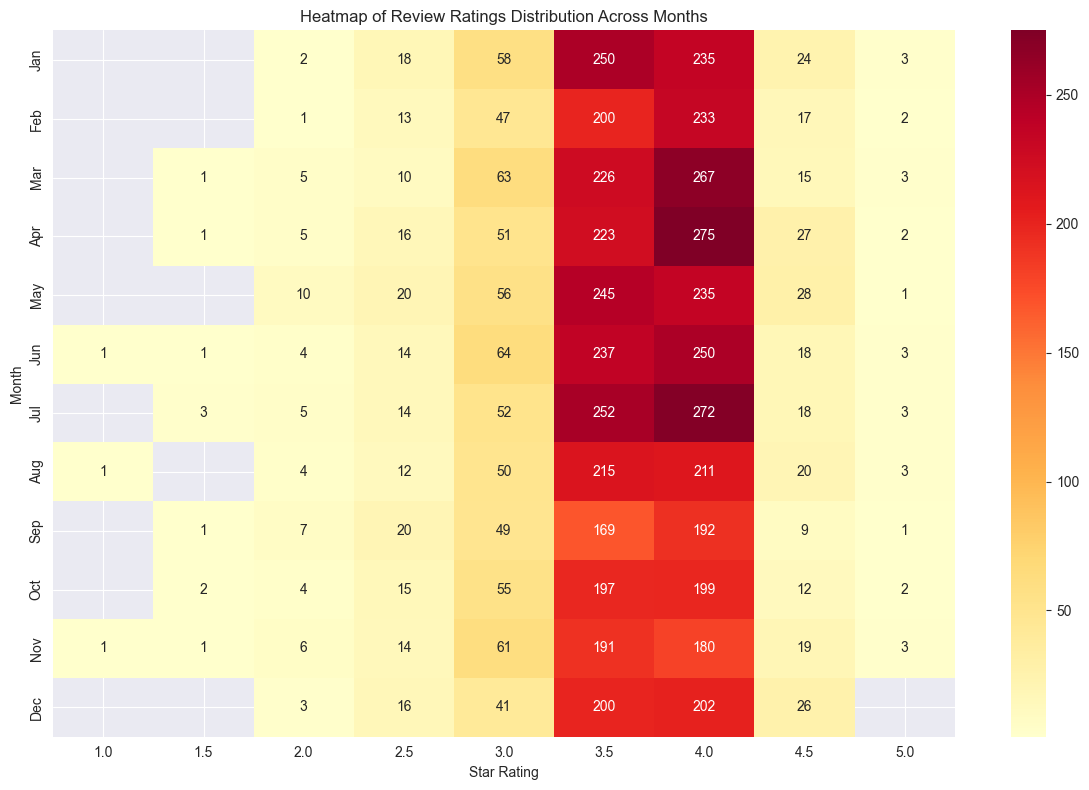

In [57]:
pivot_heatmap = restaurants.groupby(['Month_Num', 'Avg_Business_Star_Rating']).size().unstack()
pivot_heatmap.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_heatmap, annot=True, fmt='g', cmap='YlOrRd')
plt.title('Heatmap of Review Ratings Distribution Across Months')
plt.xlabel('Star Rating')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

## Monthly rating analysis

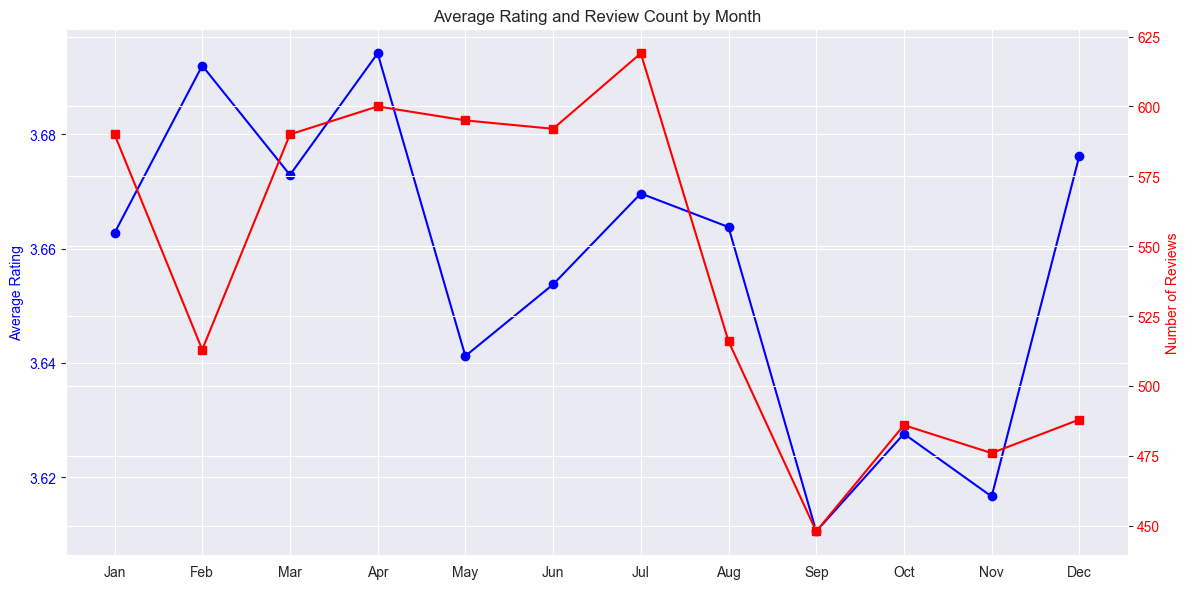

In [58]:
monthly_avg_rating = restaurants.groupby('Month_Num')['Avg_Business_Star_Rating'].agg(['mean', 'count'])
monthly_avg_rating.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot average rating
ax1.plot(monthly_avg_rating.index, monthly_avg_rating['mean'], color='blue', marker='o')
ax1.set_ylabel('Average Rating', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot number of reviews
ax2.plot(monthly_avg_rating.index, monthly_avg_rating['count'], color='red', marker='s')
ax2.set_ylabel('Number of Reviews', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Average Rating and Review Count by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## LLM Text analysis
Here I took negative and positive reviews and fed them to **Calude 3.5 Sonnet**, asking to extract common themes, here are its comments:

### Positive reviews

After analyzing the 4.5 and 5 star reviews, several strong common themes emerge:

1. Owner/Family Presence & Involvement:
- Nearly all highly-rated restaurants feature visible, engaged owners who interact with customers
- Reviewers frequently mention the owner greeting them, checking on their meal, or sharing stories
- Family-owned establishments are particularly praised, with reviewers appreciating the personal touch

2. Authenticity:
- For ethnic restaurants (especially Italian), authenticity is repeatedly highlighted
- Reviewers often mention owners/chefs being from the country of origin
- "Real" or "authentic" recipes and techniques are frequently praised

3. Personal Attention/Service:
- Attentive but not overbearing service is consistently mentioned
- Staff remembering returning customers
- Going "above and beyond" with special requests
- Small, thoughtful touches (like complimentary after-dinner drinks)

4. Atmosphere:
- "Hidden gem" or "hole in the wall" character is seen as positive
- Cozy, intimate, or homey feeling is praised
- Even when located in strip malls, reviewers appreciate the interior atmosphere

5. Value Perception:
- Not necessarily cheap, but worth the price
- Quality ingredients and preparation justify costs
- Generous portions frequently mentioned
- Special touches (like complimentary items) enhance value perception

The key difference between 4.5 and 5 star reviews seems to be that 5-star reviews often describe a "perfect" experience where all these elements come together, while 4.5-star reviews might note minor issues while still being overwhelmingly positive about the key factors above.

What's particularly interesting is how these high ratings often go to smaller, family-run establishments rather than high-end or trendy restaurants, suggesting that personal connection and authenticity matter more to reviewers than polish or prestige.

### Negative Reviews
After analyzing the negative reviews (1-2 stars), several clear patterns emerge in what people complain about most frequently:

1. Poor Service
- Rude or unfriendly staff/servers
- Long wait times, especially in drive-throughs
- Orders frequently wrong or incomplete
- Lack of attention from management
- Staff appearing disorganized or confused

2. Cleanliness Issues
- Dirty bathrooms specifically mentioned multiple times
- Unclean dining areas
- General lack of maintenance
- Comments about food safety concerns
- Worn or damaged furniture

3. Food Quality Problems
- Food served cold or lukewarm
- Undercooked items (especially meat)
- Bland or flavorless dishes
- Wrong temperatures
- Food described as "greasy" or "oily"
- Stale or poor quality ingredients

4. Value Perception
- High prices for poor quality
- Small portions
- Being charged more for substitutions
- Not getting what was paid for
- Missing items with no compensation

5. Inconsistency
- Different experiences between visits
- Varying quality between locations of same chain
- Items advertised but not available
- Menu items different from description

What's particularly interesting is how these negative reviews often contain detailed explanations and specific incidents, while positive reviews tend to be more general. Many reviewers also mention giving places multiple chances before leaving a negative review, suggesting that consistent problems rather than one-off issues drive most negative reviews.

A notable pattern is that people seem most upset when multiple issues combine - for example, both poor service AND bad food, or dirty environment AND high prices. Single issues appear more likely to result in 2-star rather than 1-star reviews.

In [83]:
# Group Negative [1.0, 2.0] and positive [4.5, 5.0] reviews
negative = [1.0, 1.5, 2.0]
positive = [4.5, 5.0]
negative_reviews = [text for text in restaurants[restaurants['Avg_Business_Star_Rating'].isin(negative)]['Review_Text']]
positive_reviews = [text for text in restaurants[restaurants['Avg_Business_Star_Rating'].isin(positive)]['Review_Text']]

# Print these reviews to be fed to LLM (Truncated for demonstration)
print("Negative Reviews:")
print(negative_reviews[:5])

print("\nPositive Reviews:")
print(positive_reviews[:5])

Negative Reviews:
["OH DEAR GOD. Someone please teach the employees here how to better scrub the toilets. I almost lost my appetite after using the women's restroom.\n\nThis Subway has NOT been closed as may have been reported by other Yelpers (I was just there on Friday), but may be it should be.", 'Feel like being treated terribly today? Go here! \nI ordered the medium size box single entree, and right off the bat the woman behind the counter raised her voice and said " I do not have that size!" Even though they have a medium size box sitting on the counter for reference. \n\nShe said " you can order two small boxes, they hold the same amount of food." I asked how much the medium box cost, she said 6 dollars. I asked how much two small boxes cost, said 7 dollars. \n\nHmmm... So you want to charge me MORE for the same amount of food, because YOU don\'t have the right size box? The woman behind the counter didn\'t see anything wrong with yelling and insisting that he had to charge me m

# Based on analyzed data showcase if there are any steps that the restaurant can take to improve their public appeal.
This questing is probably the most difficult thing to do in the data science: prescriptive analysis, but let me have my take at it. From the LLMs analysis I identified key points that lead to the better review and help avoid bad review:

## Summer Focus (Peak Volume Period)
 The data clearly shows summer as the peak review period with higher volume but lower average ratings. This critical period requires increased staffing levels and enhanced quality control measures. Implementing pre-summer staff training refreshers and developing specific protocols for handling larger crowds will help maintain service standards during these busy months. This proactive approach can help bridge the gap between quantity and quality of service during peak seasons.

## Service Enhancement
 Service quality emerges as a key differentiator between positive and negative reviews. Establishing a comprehensive staff training program focused on personal attention and consistent service delivery is essential. Regular staff meetings should be held to share customer feedback and refine service approaches. Having clear protocols for food temperature checks and presentation standards will ensure consistent quality even during busy periods.

## Personal Connection Strategy
The strong correlation between owner presence and positive reviews suggests the need for a more personal approach to customer service. Having owners present during peak hours creates a more authentic dining experience. Staff should be trained to engage with customers in a personalized way, creating memorable experiences that encourage return visits. Sharing the restaurant's story and heritage can further strengthen these connections.

##  Seasonal Menu Adaptation
Review patterns suggest the need for strategic menu adjustments throughout the year. Spring and summer menus should capitalize on peak rating periods with fresh, seasonal offerings. Fall and winter months benefit from heartier comfort foods that resonate with diners during slower periods. This adaptive approach maintains customer interest while working with natural seasonal preferences.

## Proactive Maintenance Schedule
Cleanliness concerns appear frequently in negative reviews, necessitating a more systematic approach to maintenance. Implementing a rotating schedule of deep cleaning and maintenance checks, with increased frequency during high-volume periods, will help maintain standards. Regular third-party audits can provide objective assessment and maintain accountability.

## Value Communication
Value perception plays a crucial role in customer satisfaction. The restaurant should actively communicate its commitment to quality ingredients and preparation methods. Transparency about pricing decisions and regular collection of feedback about value perception can help maintain customer trust. Seasonal promotions during slower months can help maintain steady customer flow.

## Consistency Management
Consistency issues appear frequently in negative reviews, indicating the need for standardized operations. Developing detailed recipe guides, establishing clear communication channels between kitchen and service staff, and implementing regular quality checks will help maintain consistent standards. This systematic approach ensures that every customer experience meets established quality benchmarks, regardless of visit timing.

These focused improvements, implemented with seasonal patterns in mind, will help address key concerns while building on existing strengths. The goal is to maintain high standards throughout the year while adapting to seasonal variations in customer volume and preferences.

# Bonus Question – Based on this data set which user had the highest cumulative travel distance? What distance has been covered by him/her?
Here I am using vectorized operations. My initial attempt using for loops was catastrophically slow, with ETA of 20 minutes for this dataframe. Using optimized approach I reduced time of calculation to just 26 seconds.

In [91]:
import numpy as np

def haversine_distance_vectorized(lat1, lon1, lat2, lon2):
    """
    Vectorized version of haversine distance calculation
    """
    R = 6371  # Earth's radius in kilometers

    # Convert to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

# Convert Review_Date to datetime if not already
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

# Group by user and calculate distances
def calculate_user_distance(group):
    # Sort by date
    group = group.sort_values('Review_Date')

    # Get coordinates
    lats = group['Latitude'].values
    lons = group['Longitude'].values

    # Calculate distances between consecutive points
    distances = haversine_distance_vectorized(
        lats[:-1], lons[:-1],  # all points except last
        lats[1:], lons[1:]     # all points except first
    )

    return np.sum(distances)

# Calculate distances for all users at once
distance_series = df.groupby('User_ID').apply(calculate_user_distance)
distance_df = pd.DataFrame(distance_series, columns=['Total_Distance'])
distance_df = distance_df.sort_values('Total_Distance', ascending=False)

# Get results
top_user = distance_df.index[0]
top_distance = distance_df.iloc[0]['Total_Distance']

print(f"User with highest cumulative travel distance: {top_user}")
print(f"Total distance covered: {top_distance:.2f} kilometers")

# Show top 5 users by distance
print("\nTop 5 users by travel distance:")
print(distance_df.head())

User with highest cumulative travel distance: 6uYJ-ixRxPMyf-iEbhoz2g
Total distance covered: 31766.80 kilometers

Top 5 users by travel distance:
                        Total_Distance
User_ID                               
6uYJ-ixRxPMyf-iEbhoz2g    31766.797939
WFpoTnMacPMtSmQTmJjp_Q    23827.520096
kGgAARL2UmvCcTRfiscjug    22051.370100
68Ci9UgVIVEiCGXy05loLw    19009.445757
czsmQRXhXy-S40cKpEk0Lg    17159.177270


C:\Users\User\AppData\Local\Temp\ipykernel_29672\491165124.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  distance_series = df.groupby('User_ID').apply(calculate_user_distance)


## Bonus! Top 5 longest paths on a map!
The trick to get the longest path was to go another country.

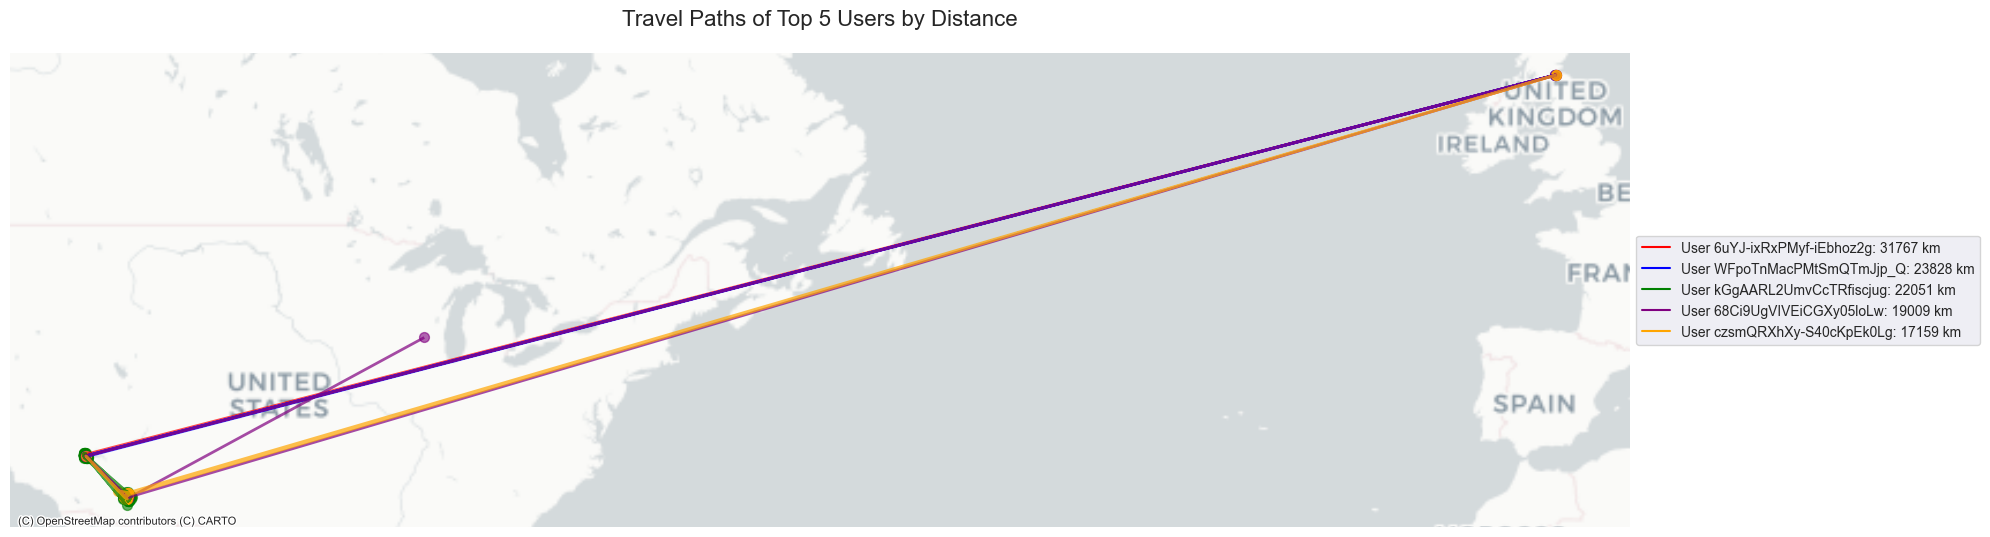

In [92]:
import contextily as ctx
import geopandas as gpd
from shapely.geometry import LineString

# Get the top 5 users
top_5_users = distance_df.head().index.tolist()

# Create a figure
fig, ax = plt.subplots(figsize=(20, 12))

# Define colors for each user
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Convert points to Web Mercator for contextily compatibility
# First create GeoDataFrame with points
all_points = []
all_paths = []
legend_elements = []

for user_id, color in zip(top_5_users, colors):
    # Get user's reviews sorted by date
    user_reviews = df[df['User_ID'] == user_id].sort_values('Review_Date')
    
    # Create list of coordinates
    coords = list(zip(user_reviews['Longitude'], user_reviews['Latitude']))
    
    # Create LineString of the path
    path = LineString(coords)
    
    # Convert to GeoDataFrame
    path_gdf = gpd.GeoDataFrame(geometry=[path], crs='EPSG:4326')
    
    # Convert to Web Mercator
    path_gdf = path_gdf.to_crs(epsg=3857)
    
    # Plot the path
    path_gdf.plot(ax=ax, color=color, linewidth=2, alpha=0.7)
    
    # Plot points
    points_gdf = gpd.GeoDataFrame(
        user_reviews,
        geometry=gpd.points_from_xy(user_reviews['Longitude'], user_reviews['Latitude']),
        crs='EPSG:4326'
    ).to_crs(epsg=3857)
    
    points_gdf.plot(ax=ax, color=color, markersize=50, alpha=0.6)
    
    # Add to legend
    distance = distance_df.loc[user_id, 'Total_Distance']
    legend_elements.append(plt.Line2D([0], [0], color=color, label=f'User {user_id}: {distance:.0f} km'))

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Customize the plot
plt.title('Travel Paths of Top 5 Users by Distance', pad=20, size=16)
plt.axis('off')

# Add legend
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()